In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [40]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [20]:
#Generate a frequency table for the product category.

frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [36]:
# Which are the top 5 most listed product categories?

frequency_table = frequency_table.head()
frequency_table


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

/var/folders/8s/v2fgqj157gb38qv2k5vqv8vw0000gn/T/ipykernel_72323/3472426422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set1");


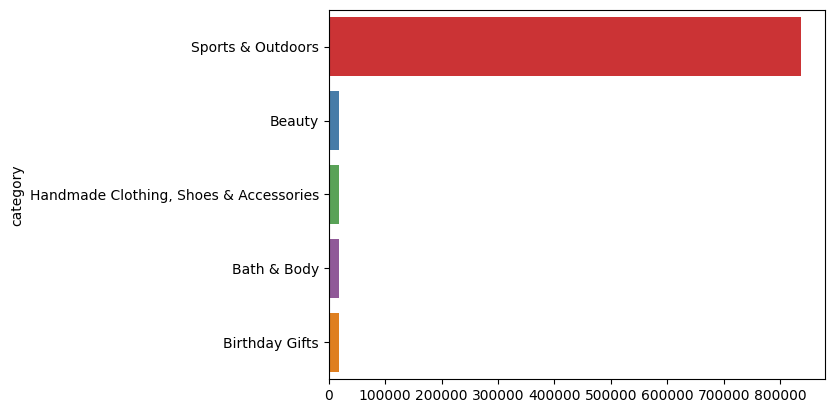

In [37]:
#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set1");
#plt.xticks(rotation=90);

In [74]:
frequency_table.value_counts()

count
836265    1
19312     1
19229     1
19092     1
18978     1
Name: count, dtype: int64

<Axes: ylabel='count'>

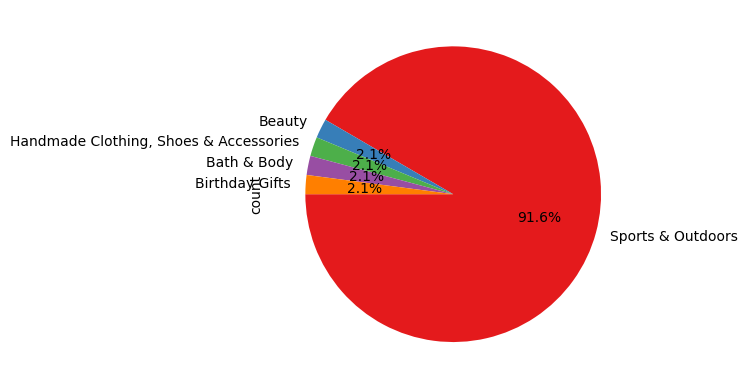

In [76]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
frequency_table.plot.pie(autopct='%1.1f%%', startangle=180, colors=sns.color_palette("Set1"))

In [54]:
#Part 2: Delving into Product Pricing
#Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#Measures of Centrality:

#Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [56]:
#What's the average price point of products listed? How does this compare with the most common price point (mode)?

print('The average price is: ', mean_price)
print('The most common price point is: ', mode_price)
print('The average price is higher than the most common price.')

The average price is:  89.24380943923663
The most common price point is:  9.99
The average price is higher than the most common price.


In [57]:
# Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532254907,
 345.60886175349884,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
#How varied are the product prices? Are there any indicators of a significant spread in prices?

'''The product prices are significantly different, and we can see it looking at least at the price range.'''

<Axes: xlabel='price', ylabel='Count'>

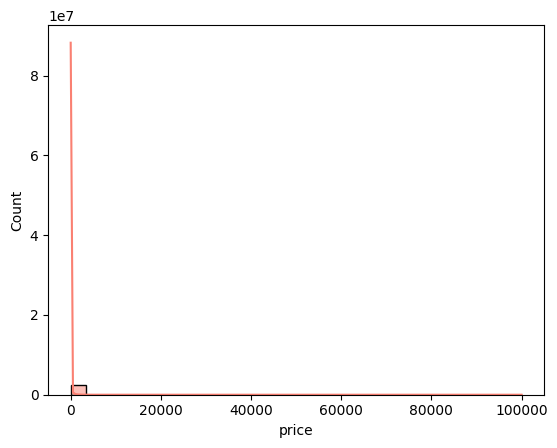

In [60]:
#Visualizations:

#Is there a specific price range where most products fall?
#Plot a histogram to visualize the distribution of product prices.
#If its hard to read these diagrams, think why this is, and explain how it could be solved..

sns.histplot(df['price'], kde=True, bins=30, color="salmon")

<Axes: ylabel='price'>

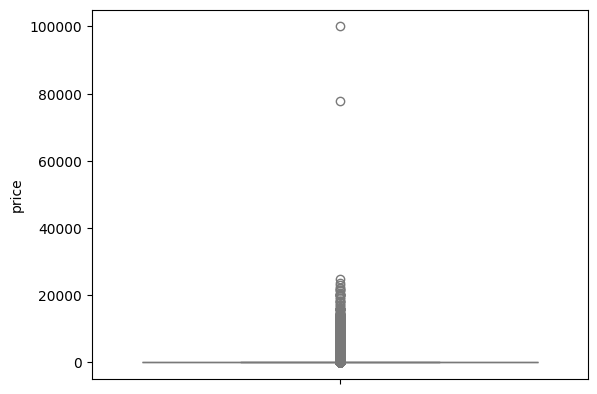

In [61]:
#Are there products that are priced significantly higher than the rest?
#Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(data = df['price'], color="lightblue")

In [62]:
#Part 3: Unpacking Product Ratings
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#Measures of Centrality:

#Calculate the mean, median, and mode for the rating of products.
#How do customers generally rate products? Is there a common trend?

mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

(2.152836472966065, 0.0, 0.0)

In [64]:
filtered_stars = df['stars'][df['stars'] != 0]

mean_filtered_stars = filtered_stars.mean()
median_filtered_stars = filtered_stars.median()
mode_filtered_stars = filtered_stars.mode()[0]

mean_filtered_stars, median_filtered_stars, mode_filtered_stars

(4.31916076222691, 4.4, 4.5)

In [66]:
#Measures of Dispersion:

#Determine the variance, standard deviation, and interquartile range for product rating.
#Are the ratings consistent, or is there a wide variation in customer feedback?

variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
quantiles_stars = df['stars'].quantile([0.25, 0.5, 0.75])

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, quantiles_stars

(4.817434029796862,
 2.1948653785134207,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [67]:
filtered_stars = df['stars'][df['stars'] != 0]

variance_filtered_stars = filtered_stars.var()
std_dev_filtered_stars = filtered_stars.std()
min_filtered_stars = filtered_stars.min()
max_filtered_stars = filtered_stars.max()
range_filtered_stars = max_filtered_stars - min_filtered_stars
quantiles_filtered_stars = filtered_stars.quantile([0.25, 0.5, 0.75])

variance_filtered_stars, std_dev_filtered_stars, min_filtered_stars, max_filtered_stars, range_filtered_stars, quantiles_filtered_stars

(0.30834337523872835,
 0.5552867504620729,
 1.0,
 5.0,
 4.0,
 0.25    4.1
 0.50    4.4
 0.75    4.6
 Name: stars, dtype: float64)

In [69]:
#Shape of the Distribution:

#Calculate the skewness and kurtosis for the rating column.
#Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

In [70]:
filtered_stars = df['stars'][df['stars'] != 0]

skewness_filtered_stars = filtered_stars.skew()
kurtosis_filtered_stars = filtered_stars.kurtosis()

skewness_filtered_stars, kurtosis_filtered_stars

(-2.3795681122127945, 9.78193769066435)

<Axes: xlabel='stars', ylabel='Count'>

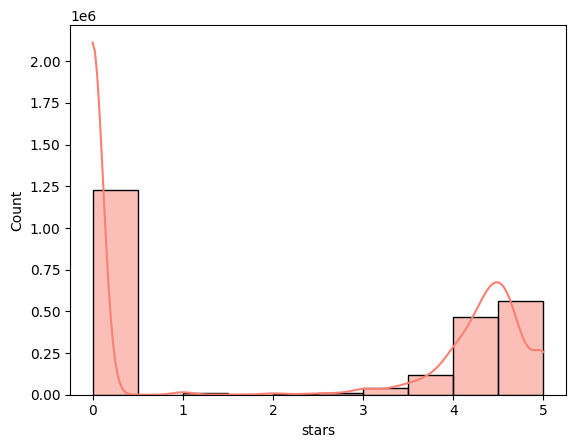

In [71]:
#Visualizations:

#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df['stars'], kde=True, bins=10, color="salmon")

<Axes: xlabel='stars', ylabel='Count'>

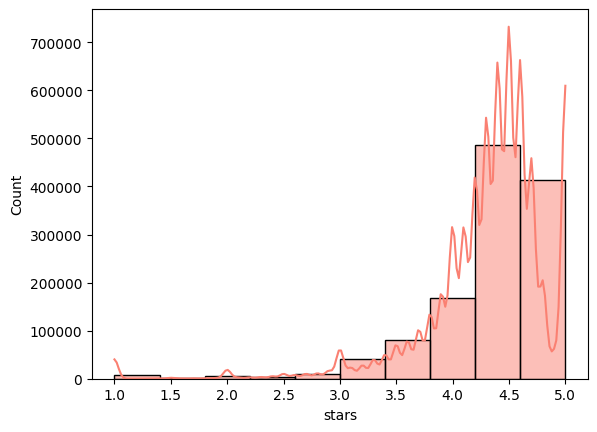

In [72]:
filtered_stars = df['stars'][df['stars'] != 0]

sns.histplot(filtered_stars, kde=True, bins=10, color="salmon")

In [ ]:
    '''the most common ratings are 4.5 and 5 stars'''